In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import scale, minmax_scale, normalize, binarize
from sklearn.feature_selection import SelectKBest, SelectPercentile, VarianceThreshold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import LeaveOneOut, KFold, train_test_split
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('agrupamento_Q1.csv')

In [70]:
dataset.head()

,X1,X2,X3,X4
0,-0.075701,0.470857,0.133139,-0.152900
1,-0.328561,0.427323,-0.181237,-0.173041
2,-0.470727,-0.150515,0.000954,0.070937
3,-0.280037,-0.250587,-0.216587,-0.372430
4,-0.139359,-0.124966,0.081284,0.083914


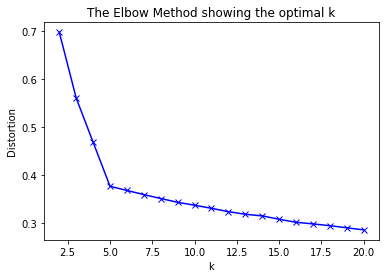

In [9]:
all_k = range(2,21)
distortions = []
for k in all_k :
    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])

# Plot the elbow
plt.plot(all_k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

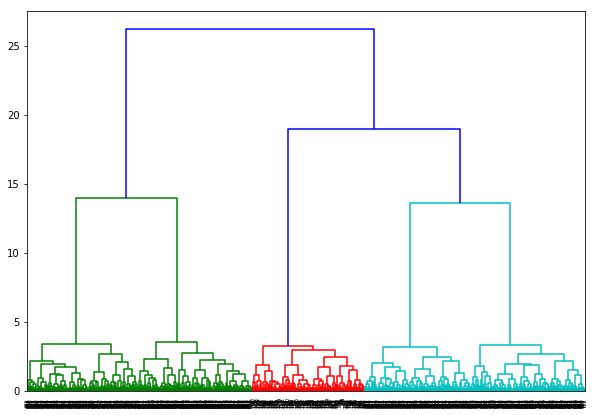

In [4]:
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))  

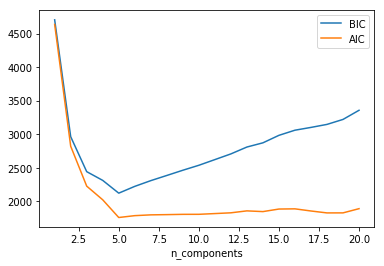

In [48]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(dataset)
          for n in n_components]

plt.plot(n_components, [m.bic(dataset) for m in models], label='BIC')
plt.plot(n_components, [m.aic(dataset) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [62]:
n_components = np.arange(2, 10)
labels = np.arange(0,4)

In [56]:
gmm = GMM(n_components=5, init_params='random')
gmm.fit(dataset)
gmm.predict(dataset)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [69]:
scorer = lambda est, data: (np.mean(est.bic(data)*-1))


gmm = GMM(n_components=5, init_params='random')
kf = KFold(n_splits=10,shuffle=False)

param_grid = {'n_components': n_components,
              'init_params': ['random','kmeans'],
              'covariance_type': ['full', 'tied', 'diag','spherical']}

grid = GridSearchCV(GMM(), param_grid, scoring=scorer)
grid.fit(dataset)


TypeError: <lambda>() missing 1 required positional argument: 'y_true'

In [55]:
print(grid.best_score_)
print(grid.best_params_)

-3408.319540955152
{'covariance_type': 'spherical', 'init_params': 'random', 'n_components': 2}


In [46]:
grid.grid_scores_

[mean: 5828.87993, std: 955.46229, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 2},
 mean: 5762.07808, std: 1029.48113, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 3},
 mean: 6128.96453, std: 1638.98111, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 4},
 mean: 6252.88090, std: 1616.41536, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 5},
 mean: 6346.34660, std: 1754.91698, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 6},
 mean: 6234.47353, std: 1277.15524, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 7},
 mean: 6510.07123, std: 1360.73088, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 8},
 mean: 6609.98885, std: 1733.50511, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 9},
 mean: 5828.87993, std: 955.46229, params: {'covariance_type': 'f

In [27]:
from pprint import pprint
pprint(vars(grid))

{'best_estimator_': GMM(covariance_type='spherical', init_params='random', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0),
 'best_params_': {'covariance_type': 'spherical',
                  'init_params': 'random',
                  'n_components': 1},
 'best_score_': -3.7377401050197507,
 'cv': 5,
 'error_score': 'raise',
 'estimator': GMM(covariance_type='diag', init_params='random', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0),
 'fit_params': {},
 'grid_scores_': [mean: -10.61014, std: 3.79402, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 1},
                  mean: -11.39897, std: 3.05021, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 2},
                  mean: -11.95154, std: 2.36153, params: {'covariance_type': 'full', 'init_params': 'random', 'n_components': 3},
                  m